In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [9]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X, Y)


DecisionTreeClassifier(criterion='entropy')

In [16]:
from sklearn import tree

[Text(418.5, 498.3, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),

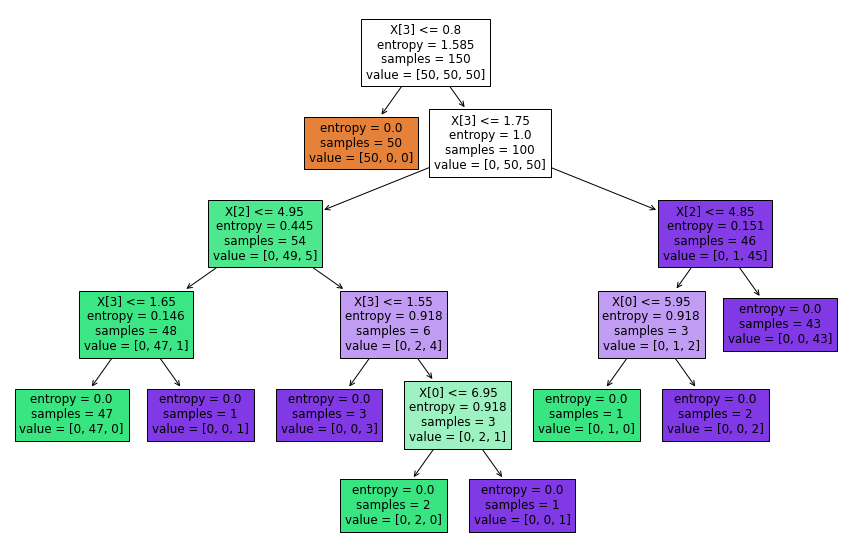

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [19]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(334.8, 453.0, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(334.8, 90.59999999999997, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(669.6, 90.59999999999997, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

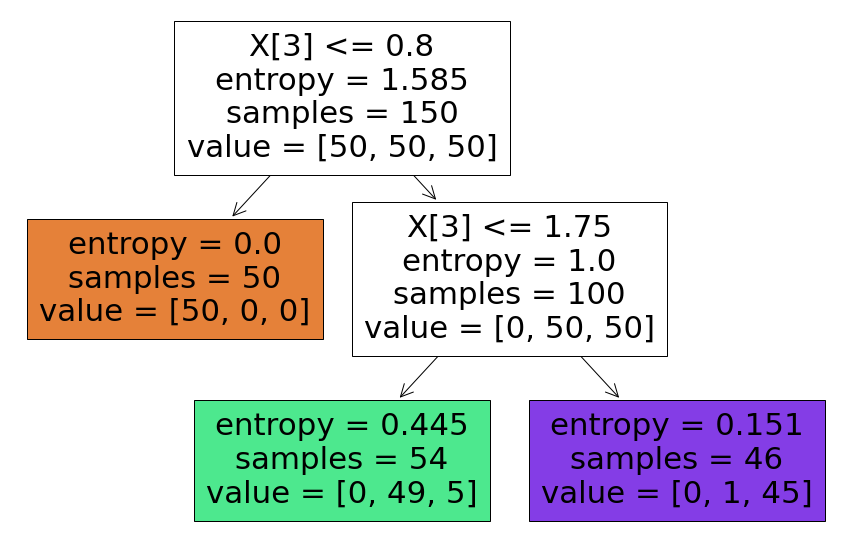

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [21]:
#prepunning
from sklearn.model_selection import GridSearchCV
params={'max_depth':[2,4,6,8,10,12],
        'min_samples_split':[2,3,4],
         'min_samples_leaf':[1,2]}
clf=tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [25]:
print(gcv.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
print(gcv.best_score_)

0.9666666666666668
